# K-Means Clustering

Objective: Predicting the optimum number of clusters and representing it visually for the given dataset.

## Author: Pranshu Dhingra

-------------------------------------------------

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline

# Reading the Data

In [2]:
# Reading data from remote link
iris_data = pd.read_csv('Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data['Species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exploring the Data through Visualization

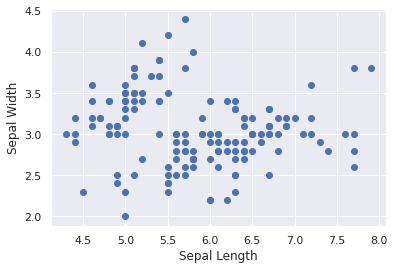

In [4]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width)

plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

There doesn't seem to be any correlation between the sepal length and the sepal width.

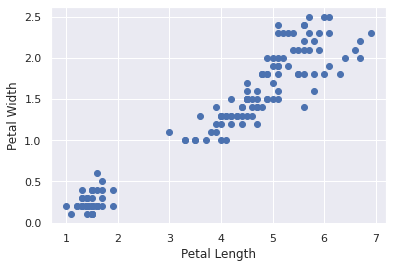

In [5]:
# Create a scatter plot based on two corresponding features (petal_length and petal_width)

plt.scatter(iris_data['PetalLengthCm'],iris_data['PetalWidthCm'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

There seems to be a strong and positive correlation between Petal length and the petal width.

In [6]:
# extracting all rows of first column till the fourth column 

x = iris_data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# finding the correlation between all the features of the dataset pair-wise

corr_matrix=x.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


A pair-wise correlation analysis of the features helps develop a relation between the different features under study.

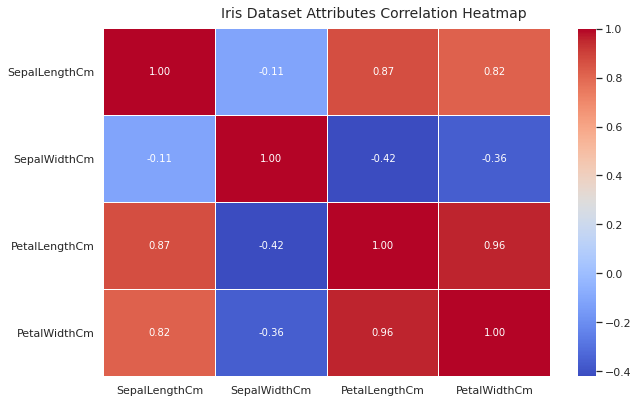

In [8]:
# plotting a heatmap to visualize the significant correlations of pair of variables

f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(corr_matrix,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Iris Dataset Attributes Correlation Heatmap', fontsize=14)

Visualizing the correlation matrix as a heatmap helps us realize that Sepal Width is the only feature not significantly correlated with any other feature.
Sepal Length has a good correlation with the petal length as well as the petal width and also, there is a good correlation between the petal length and the petal width.
These relationships will help us verify our results in the latter part.

### Checking the distributions of each of the features

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

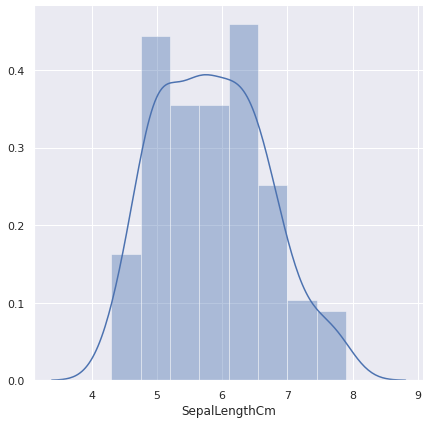

In [10]:
sns.FacetGrid(iris_data,height=6).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

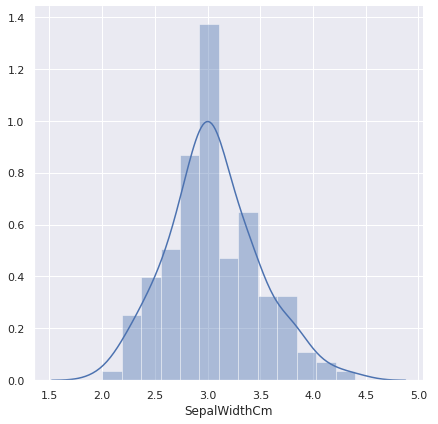

In [11]:
sns.FacetGrid(iris_data,height=6).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

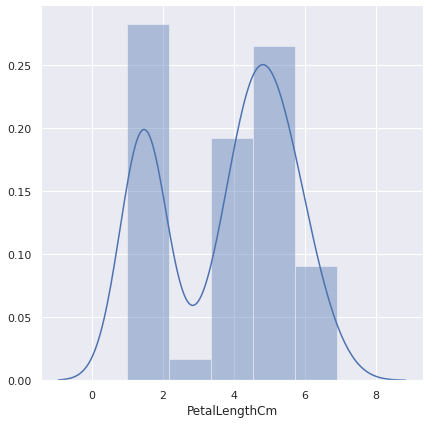

In [12]:
sns.FacetGrid(iris_data,height=6).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

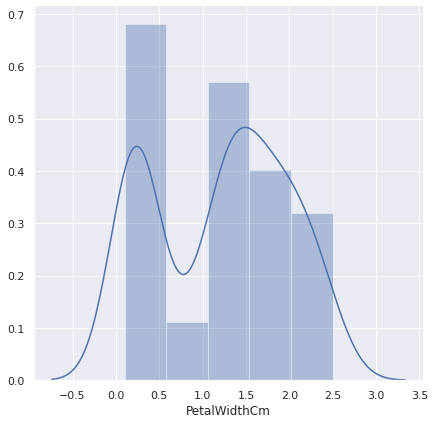

In [13]:
sns.FacetGrid(iris_data,height=6).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

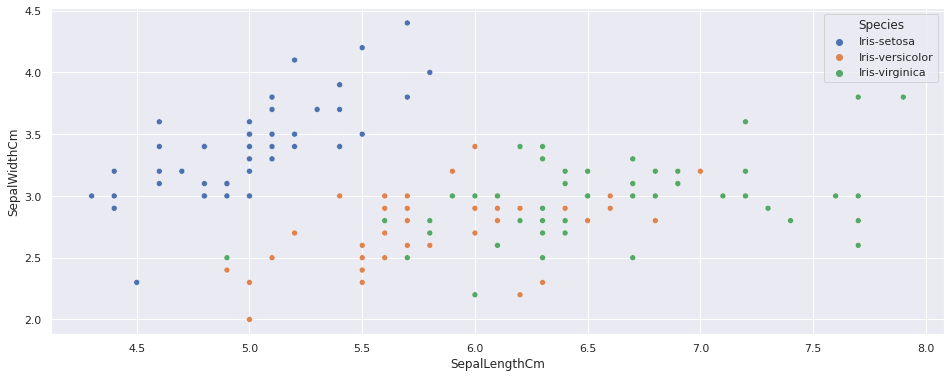

In [14]:
#scatterplot for sepal width against the sepal length differentiated on the basis of hue


plt.figure(figsize=(16,6))
sns.scatterplot(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'], hue=iris_data['Species'])

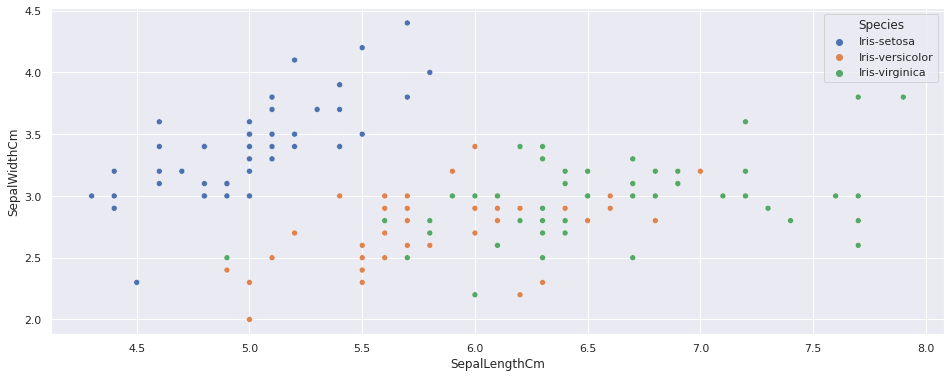

In [15]:
#scatterplot for petal width against the petal length differentiated on the basis of hue

plt.figure(figsize=(16,6))
sns.scatterplot(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'], hue=iris_data['Species'])

### Representation of Data Points based on all the features

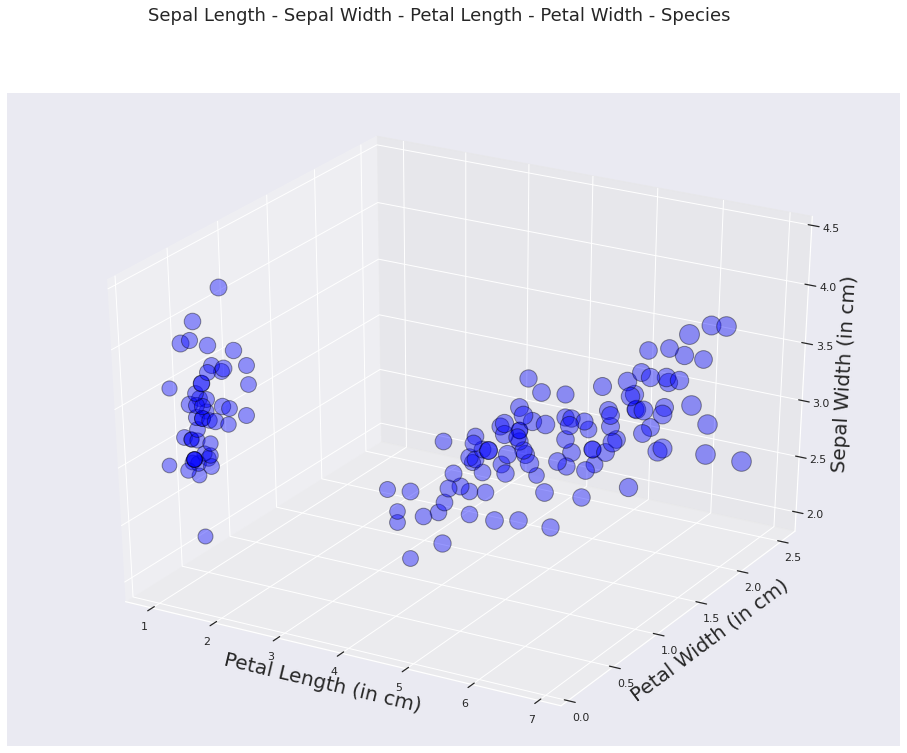

In [16]:
# Visualizing 4-D mix data using bubble charts
# leveraging the concepts of size 

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Sepal Length - Sepal Width - Petal Length - Petal Width - Species', fontsize=18)

xs = list(iris_data['PetalLengthCm'])
ys = list(iris_data['PetalWidthCm'])
zs = list(iris_data['SepalWidthCm'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(iris_data['SepalLengthCm'])

for data, size in zip(data_points, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c='blue',edgecolors='black', s=size*50)

ax.set_xlabel('Petal Length (in cm)')
ax.set_ylabel('Petal Width (in cm)')
ax.set_zlabel('Sepal Width (in cm)')
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
ax. zaxis. label. set_size(20)


The sepal length has been shown by leveraging the concept of size in the 3-D scatter plot.


# Finding the Optimum Number of Clusters

### Finding the optimum number of clusters involve minimizing the Within Cluster Sum of Squares (WCSS).

WCSS is plotted against the various number of clusters. The curve of this graph is somewhat elbow-shaped. The point at which the elbow seems curved is conisdered to be the optimal point and hence the optimal number of clusters that should be considered.


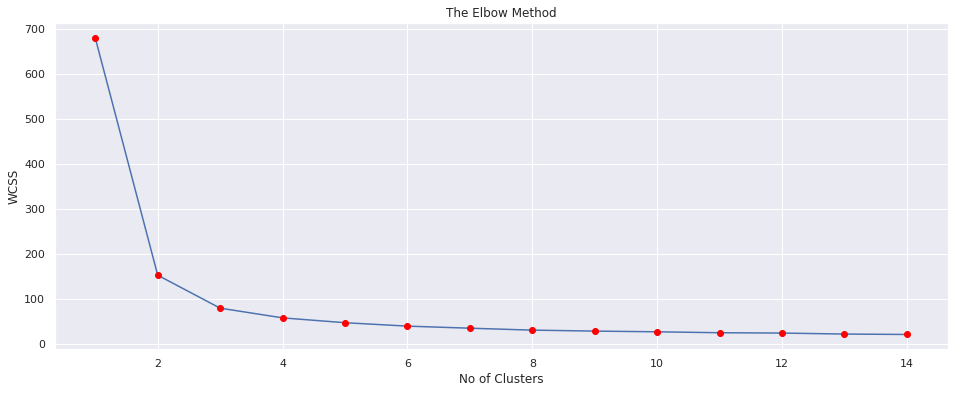

In [17]:
# Plotting Within Cluster Sum of Squares against the Number of Clusters
# This will helps us find the optimal number of clusters that must be formed such that Within Cluster Sum of Squares (WCSS) is
# minimized and Between Cluster Sum of Squares is maximized

x = iris_data.iloc[:,1:5]

wcss=[]
from sklearn.cluster import KMeans
for i in range(1,15):
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit_predict(x)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(16,6))
plt.plot(range(1,15),wcss)
plt.plot(np.arange(1 , 15) , wcss , 'o',c='red')
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

The curve of the elbow shaped graph appears to be at 3. Thus, the optimum number of clusters that can be seen from the graph is 3.

### Let us visualize and see each of the three species type seperately.

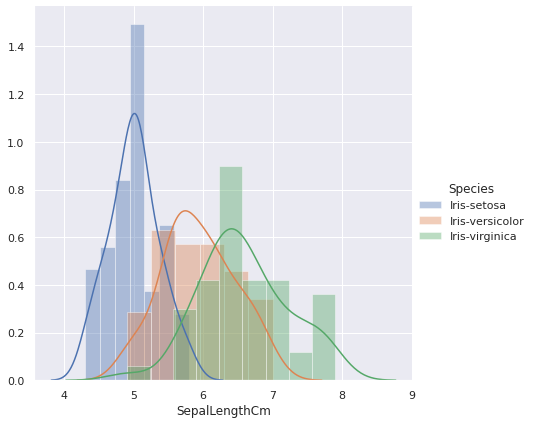

In [18]:
sns.FacetGrid(iris_data, hue='Species',height=6).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

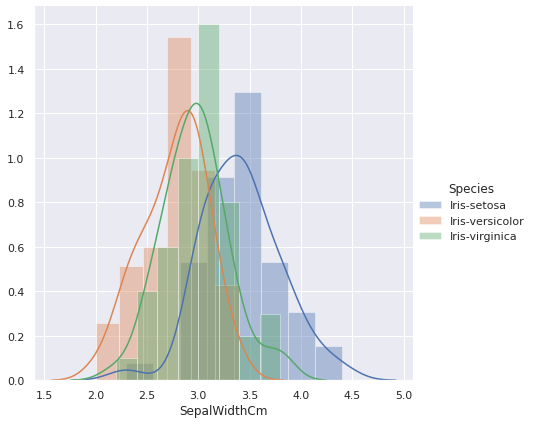

In [19]:
sns.FacetGrid(iris_data,hue='Species',height=6).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

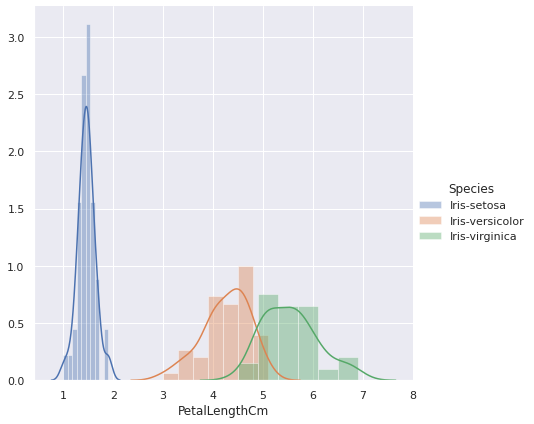

In [20]:
sns.FacetGrid(iris_data,hue='Species',height=6).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

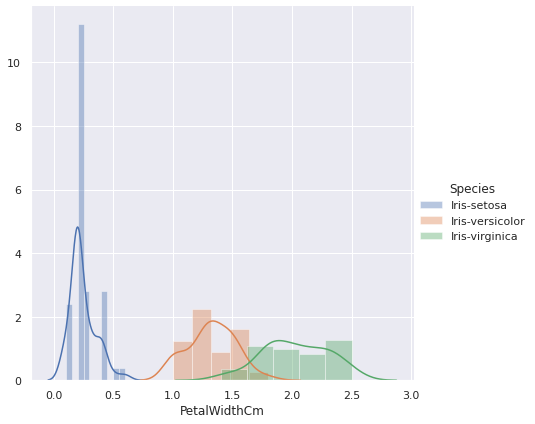

In [21]:
sns.FacetGrid(iris_data, hue='Species',height=6).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

From the four graphs plotted above, we can make some conclusions:

1.) Using the petal-length, Iris Setosa can be separated.

2.) Nothing can be done using sepal length and sepal width as the graphs for all three of them clearly overlaps.

3.) In the graph of petal-width, iris setosa is not distributed properly but in petal-length it is. So, we are going to use petal-length as the feature in order to separate iris-setosa.

# Predicting the Cluster 

In this step, we are going to predict the cluster group of each observation based on the Euclidean distance of the centroid from the initialized seed.

In [22]:
# In this step, we are going to predict the cluster group of each observation based on the Euclidean distance of the centroid\
#from the initialized seed

km=KMeans(n_clusters=3)
y_predict=km.fit_predict(iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
iris_data["cluster"]=y_predict
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


# Plotting the Optimized Number of Clusters

In [23]:
#initializing the clusters to the variables 

cl1=iris_data[iris_data.cluster==0]
cl2=iris_data[iris_data.cluster==1]
cl3=iris_data[iris_data.cluster==2]

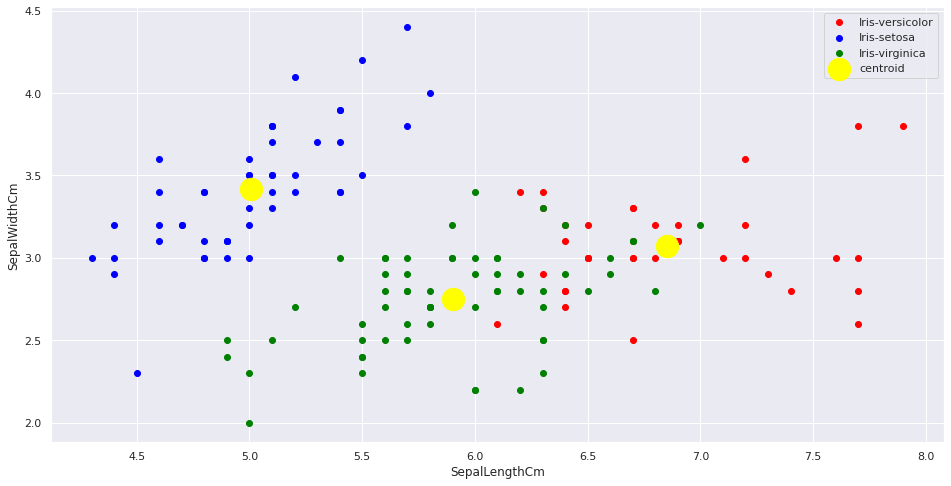

In [24]:
# plotting the clusters for the different species considering the features of 'Sepal Length' and the 'Sepal Width' 

plt.figure(figsize=(16,8))
plt.scatter(cl1['SepalLengthCm'],cl1['SepalWidthCm'],color='red',label='Iris-versicolor')
plt.scatter(cl2['SepalLengthCm'],cl2['SepalWidthCm'],color='blue',label='Iris-setosa')
plt.scatter(cl3['SepalLengthCm'],cl3['SepalWidthCm'],color='green',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color='yellow',marker='o',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

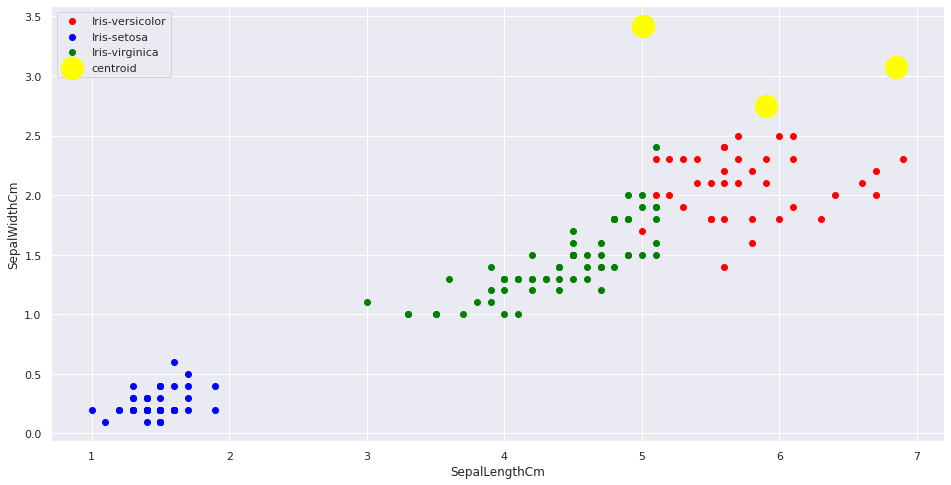

In [25]:
# plotting the clusters for the different species considering the features of 'Petal Length' and the 'Petal Width' 

plt.figure(figsize=(16,8))
plt.scatter(cl1['PetalLengthCm'],cl1['PetalWidthCm'],color='red',label='Iris-versicolor')
plt.scatter(cl2['PetalLengthCm'],cl2['PetalWidthCm'],color='blue',label='Iris-setosa')
plt.scatter(cl3['PetalLengthCm'],cl3['PetalWidthCm'],color='green',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color='yellow',marker='o',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

# Representation of Optimized Clusters based on all the features

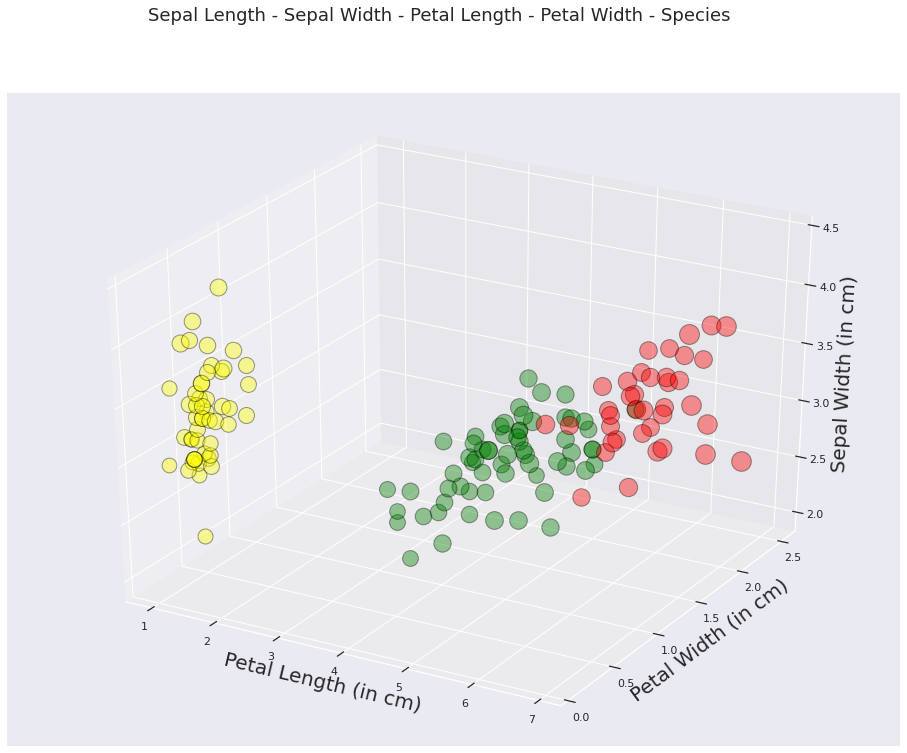

In [26]:
# 5-D representation considering three of the features on the 3-axes, one feature differentiated through size, and the other through color

# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Sepal Length - Sepal Width - Petal Length - Petal Width - Species', fontsize=18)

xs = list(iris_data['PetalLengthCm'])
ys = list(iris_data['PetalWidthCm'])
zs = list(iris_data['SepalWidthCm'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(iris_data['SepalLengthCm'])
colors = ['red' if wt == 0 else 'yellow' if wt == 1 else 'green' for wt in list(iris_data['cluster'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='black', s=size*50)

ax.set_xlabel('Petal Length (in cm)')
ax.set_ylabel('Petal Width (in cm)')
ax.set_zlabel('Sepal Width (in cm)')
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
ax. zaxis. label. set_size(20)


# Thank You!